# Загрузка библиотек, загрузка датасета

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.pipeline import make_pipeline

In [ ]:
# !pip install ydata_profiling

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.8 MB/s  0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0━━━━━━━━━━━  3/11 [typing_extensions]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [ydata_profiling] [visions]sions]


In [ ]:
# !pip install phik
# import phik
# from phik.report import plot_correlation_matrix

In [4]:
data = pd.read_csv('/Users/moskvinanata/Documents/Магистратура/_УРФУ ИИ/Проектный практикум/ObesityDataSet.csv')

https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset

# Описание параметров с KAGLE

Column Descriptions:  
Gender – Male or Female.  
Age – The person’s age in years.  
Height – Height in meters.  
Weight – Weight in kilograms.  
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).  
FAVC – If the person frequently consumes high-calorie foods (yes/no).  
FCVC – Frequency of vegetable consumption (scale from 1 to 3).  
NCP – Number of main meals per day.  
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).  
SMOKE – Whether the person smokes (yes/no).  
CH2O – Daily water intake (scale from 1 to 3).  
SCC – If the person monitors their calorie intake (yes/no)  
FAF – Physical activity frequency (scale from 0 to 3).  
TUE – Time spent using technology (scale from 0 to 3).  
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).  
NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

# Описание датасета

## Демографические и антропометрические данные

### **Gender**
- **Расшифровка**: Gender
- **Описание**: Пол пациента
- **Тип**: Категориальный (Male/Female)

### **Age** 
- **Расшифровка**: Age
- **Описание**: Возраст в годах
- **Тип**: Числовой

### **Height**
- **Расшифровка**: Height  
- **Описание**: Рост в метрах
- **Тип**: Числовой

### **Weight**
- **Расшифровка**: Weight
- **Описание**: Вес в килограммах
- **Тип**: Числовой

## Семейный анамнез

### **family_history_with_overweight**
- **Расшифровка**: Family History with Overweight
- **Описание**: Наличие семейной истории избыточного веса
- **Тип**: Категориальный (yes/no)

## Пищевые привычки

### **FAVC**
- **Расшифровка**: **F**requent **A**consumption of **V**egetables **C**alories
- **Описание**: Частое употребление высококалорийной пищи
- **Тип**: Категориальный (yes/no)

### **FCVC**
- **Расшифровка**: **F**requency of **C**onsumption of **V**egetables 
- **Описание**: Частота потребления овощей (шкала 1-3)
- **Тип**: Числовой (1-3)
- **Значения**: 
  - 1 = Редко/Никогда
  - 2 = Иногда  
  - 3 = Всегда/Часто

### **NCP**
- **Расшифровка**: **N**umber of **C**main **M**eals (**P**er day)
- **Описание**: Количество основных приемов пищи в день
- **Тип**: Числовой (1-4)

### **CAEC**
- **Расшифровка**: **C**onsumption of **F**ood **B**etween **M**eals
- **Описание**: Потребление пищи между основными приемами пищи
- **Тип**: Категориальный
- **Значения**:
  - no = Не потребляю
  - Sometimes = Иногда
  - Frequently = Часто
  - Always = Всегда

## Вредные привычки

### **SMOKE**
- **Расшифровка**: Smoke
- **Описание**: Курение
- **Тип**: Категориальный (yes/no)

### **CH2O**
- **Расшифровка**: **C**onsumption of **W**ater **D**aily (CH₂O - химическая формула воды)
- **Описание**: Потребление воды в день (шкала 1-3)
- **Тип**: Числовой (1-3)
- **Значения**:
  - 1 = Менее 1 литра
  - 2 = 1-2 литра  
  - 3 = Более 2 литров

## Физическая активность

### **SCC**
- **Расшифровка**: **C**alories **C**onsumption **M**onitoring
- **Описание**: Мониторинг потребления калорий
- **Тип**: Категориальный (yes/no)

### **FAF**
- **Расшифровка**: **P**hysical **A**ctivity **F**requency
- **Описание**: Частота физической активности (раз в неделю)
- **Тип**: Числовой (0-3)
- **Значения**:
  - 0 = Нет активности
  - 1 = 1-2 дня в неделю
  - 2 = 2-4 дня в неделю
  - 3 = 4-5 дней в неделю

### **TUE**
- **Расшифровка**: **T**ime Using **T**echnology **D**evices
- **Описание**: Время использования технологических устройств (часов в день)
- **Тип**: Числовой (0-2)
- **Значения**:
  - 0 = 0-2 часа
  - 1 = 3-5 часов
  - 2 = Более 5 часов

## Дополнительные привычки

### **CALC**
- **Расшифровка**: **C**onsumption of **A**lcohol
- **Описание**: Потребление алкоголя
- **Тип**: Категориальный
- **Значения**:
  - no = Не потребляю
  - Sometimes = Иногда
  - Frequently = Часто

### **MTRANS**
- **Расшифровка**: **M**ode of **Trans**portation
- **Описание**: Транспорт, который использует человек
- **Тип**: Категориальный
- **Значения**:
  - Automobile = Автомобиль
  - Bike = Велосипед
  - Motorbike = Мотоцикл
  - Public_Transportation = Общественный транспорт
  - Walking = Ходьба

## Целевая переменная

### **NObeyesdad**
- **Расшифровка**: **N**ormal **Weight** and **Obesity****dad** (классификация)
- **Описание**: Классификация веса по уровням ожирения
- **Тип**: Категориальный
- **Значения**:
  - Insufficient_Weight = Недостаточный вес
  - Normal_Weight = Нормальный вес
  - Overweight_Level_I = Избыточный вес уровень I
  - Overweight_Level_II = Избыточный вес уровень II  
  - Obesity_Type_I = Ожирение тип I
  - Obesity_Type_II = Ожирение тип II
  - Obesity_Type_III = Ожирение тип III

## Расчетные показатели (можно добавить)

### **BMI** (можно рассчитать)
- **Расшифровка**: **B**ody **M**ass **I**ndex
- **Описание**: Индекс массы тела
- **Формула**: `BMI = Weight (kg) / (Height (m))²`
- **Интерпретация**:
  - <18.5 = Недостаточный вес
  - 18.5-24.9 = Нормальный вес
  - 25-29.9 = Избыточный вес
  - 30-34.9 = Ожирение I степени
  - 35-39.9 = Ожирение II степени
  - ≥40 = Ожирение III степени

Этот датасет действительно хорошо подготовлен для анализа факторов, влияющих на ожирение! 🎯

# Базовый анализ датасета

In [5]:
# 1. Аналог data.DESCR - посмотреть основную информацию о датасете
print("=== ОСНОВНАЯ ИНФОРМАЦИЯ ===")
print(data.info())

# 2. Посмотреть первые строки данных (аналог беглого просмотра описания)
print("\n=== ПЕРВЫЕ СТРОКИ ДАННЫХ ===")
print(data.head())

# 3. Более подробная статистика (то, что вы уже делали)
print("\n=== СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ===")
print(data.describe())

# 4. Для нечисловых колонок
print("\n=== ОПИСАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===")
print(data.describe(include=['object']))

=== ОСНОВНАЯ ИНФОРМАЦИЯ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

# Расширенный анализ для полного понимания данных

In [6]:
# 5. Размеры датасета
print(f"Размер датасета: {data.shape[0]} строк, {data.shape[1]} колонок")

# 6. Имена всех колонок
print(f"\nНазвания колонок: {list(data.columns)}")

# 7. Типы данных в каждой колонке
print("\n=== ТИПЫ ДАННЫХ ===")
print(data.dtypes)

# 8. Проверка пропущенных значений
print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
print(data.isnull().sum())

# 9. Уникальные значения в каждой колонке (особенно полезно для категориальных)
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in data.columns:
    unique_count = data[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {data[column].unique()}")

Размер датасета: 2111 строк, 17 колонок

Названия колонок: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

=== ТИПЫ ДАННЫХ ===
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

=== ПРОПУЩЕННЫЕ ЗН

# Выводы (Назначение категориальных типов) ⬅️⬅️⬅️ ‼️‼️‼️

In [7]:
categorical_numeric_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("Типы данных до преобразования:")
print(data[categorical_numeric_features].dtypes)

Типы данных до преобразования:
FCVC    float64
NCP     float64
CH2O    float64
FAF     float64
TUE     float64
dtype: object


In [8]:
# Преобразуем в категориальный тип
for col in categorical_numeric_features:
    data[col] = data[col].astype('category')

print("\nТипы данных после преобразования:")
print(data[categorical_numeric_features].dtypes)


Типы данных после преобразования:
FCVC    category
NCP     category
CH2O    category
FAF     category
TUE     category
dtype: object


In [9]:
# Типы данных в каждой колонке
print("\n=== ТИПЫ ДАННЫХ ===")
print(data.dtypes)


=== ТИПЫ ДАННЫХ ===
Gender                              object
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                              category
NCP                               category
CAEC                                object
SMOKE                               object
CH2O                              category
SCC                                 object
FAF                               category
TUE                               category
CALC                                object
MTRANS                              object
NObeyesdad                          object
dtype: object


# Визуальный анализ

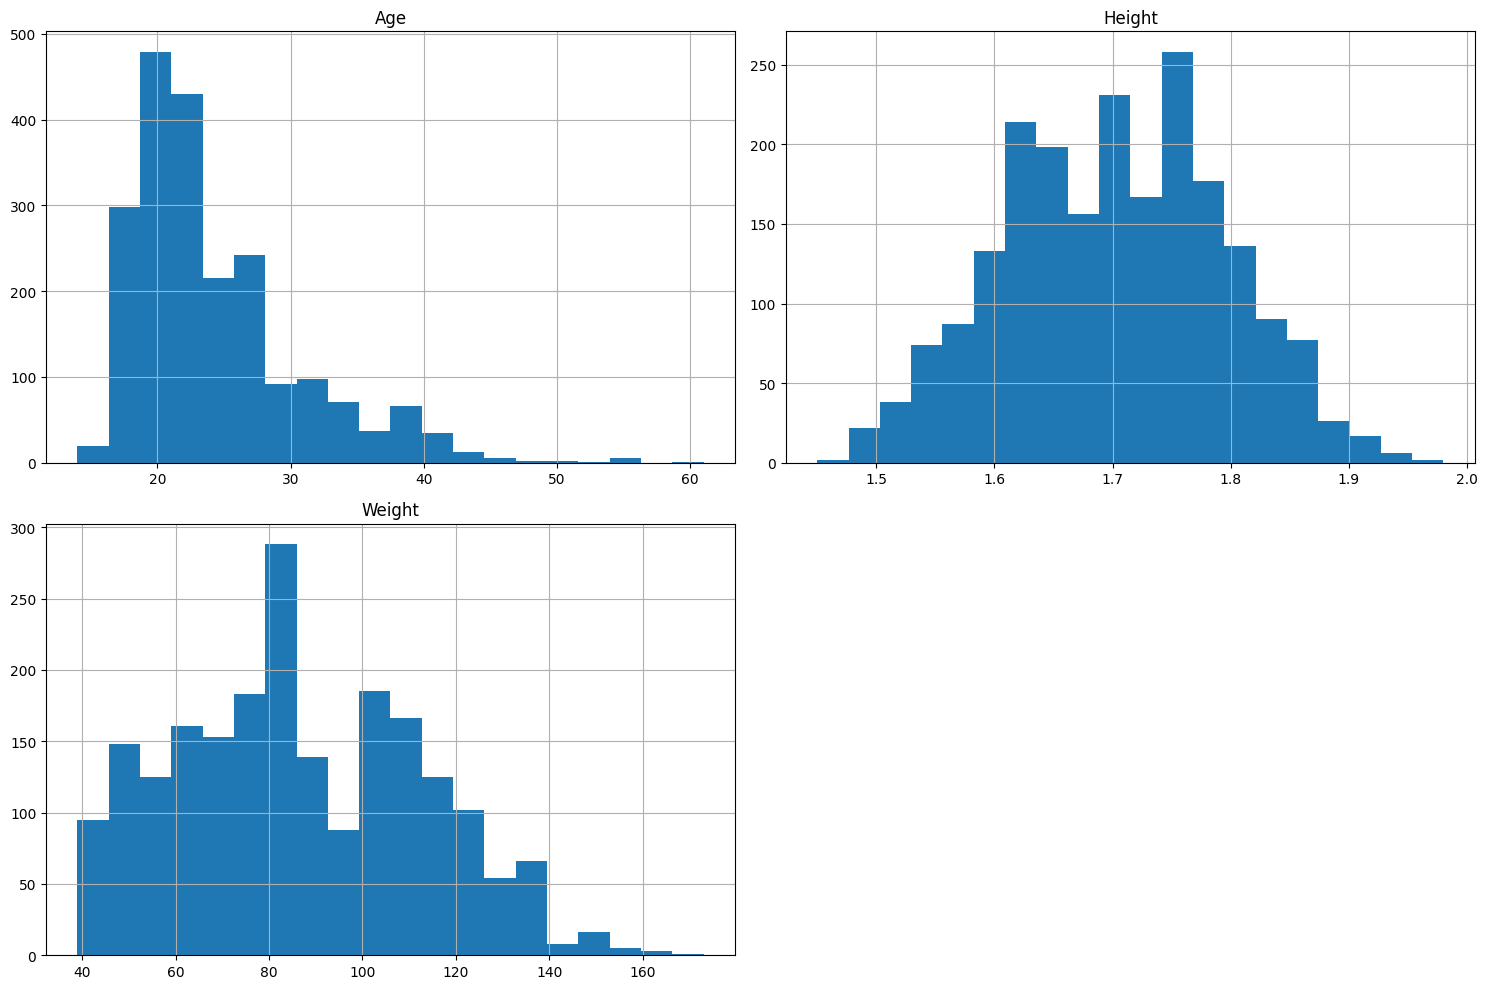

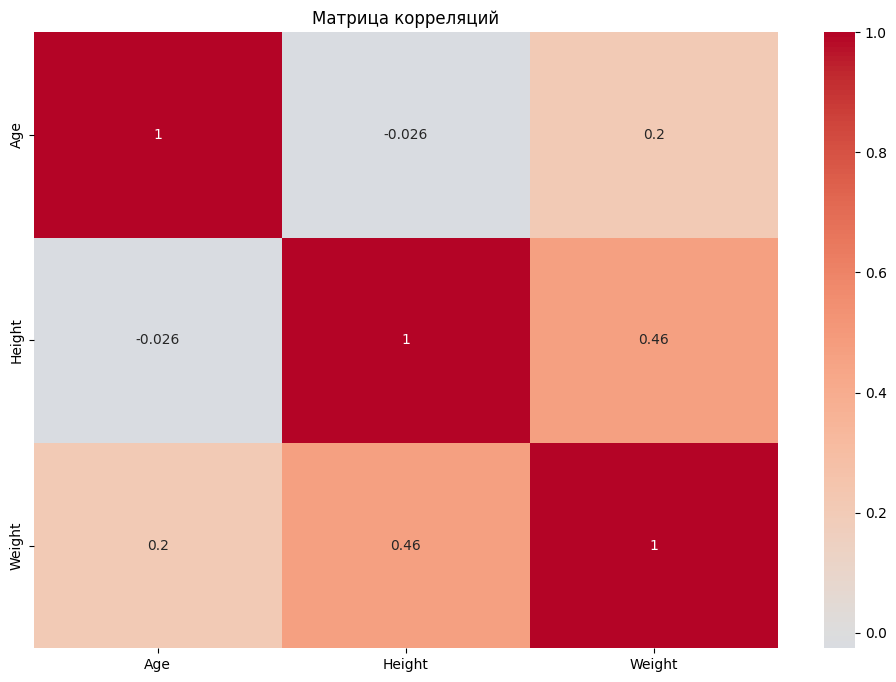

In [10]:
# 10. Гистограммы для числовых колонок
import matplotlib.pyplot as plt

data.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# 11. Матрица корреляций (только для числовых данных)
import seaborn as sns

plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

# Анализ. Вторая волна.

## Распределения

In [11]:
# Целевая переменная
print("Распределение целевой переменной (ожирение):")
print(data['NObeyesdad' if 'NObeyesdad' in data.columns else data.columns[-1]].value_counts())

# Демографические данные
demographic_cols = ['Gender', 'Age', 'Height', 'Weight', 'family_history']
for col in demographic_cols:
    if col in data.columns:
        print(f"\n{col}:")
        print(data[col].value_counts().head())

Распределение целевой переменной (ожирение):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Age:
Age
18.0    128
26.0    101
21.0     96
23.0     89
19.0     59
Name: count, dtype: int64

Height:
Height
1.70    60
1.65    50
1.60    43
1.75    39
1.62    36
Name: count, dtype: int64

Weight:
Weight
80.0    59
70.0    43
50.0    42
75.0    40
60.0    37
Name: count, dtype: int64


## 1. Анализ распределения целевой переменной

=== РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


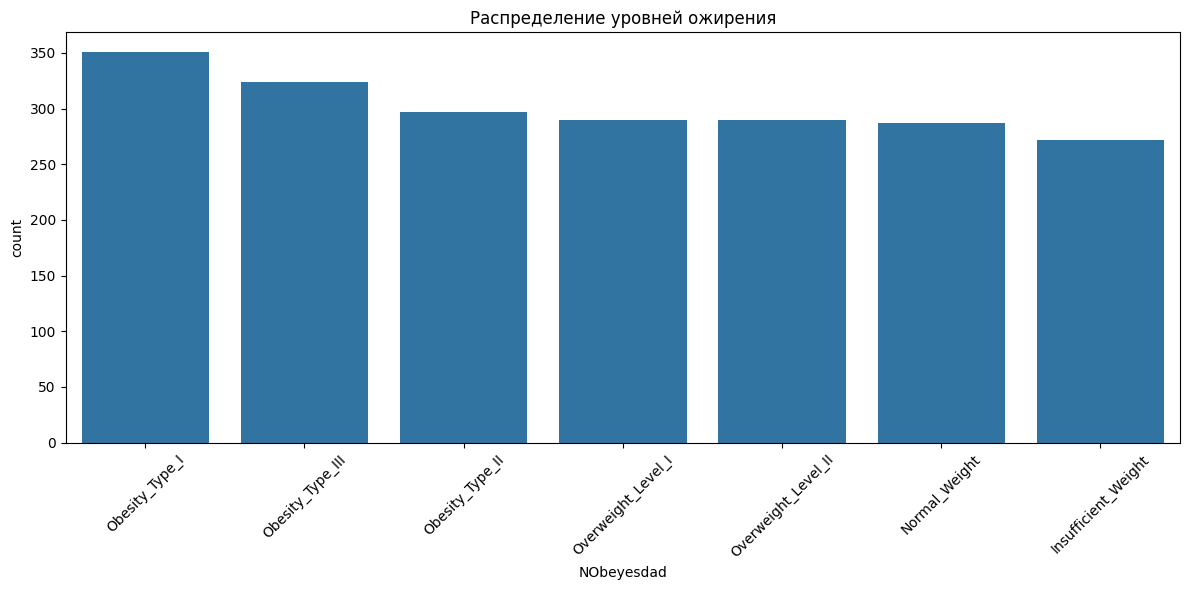

In [12]:
print("=== РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===")
target_distribution = data['NObeyesdad'].value_counts()
print(target_distribution)

# Визуализация
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='NObeyesdad', order=target_distribution.index)
plt.xticks(rotation=45)
plt.title('Распределение уровней ожирения')
plt.tight_layout()
plt.show()

## 2. Анализ важных числовых признаков  ⬅️⬅️⬅️ ‼️‼️‼️

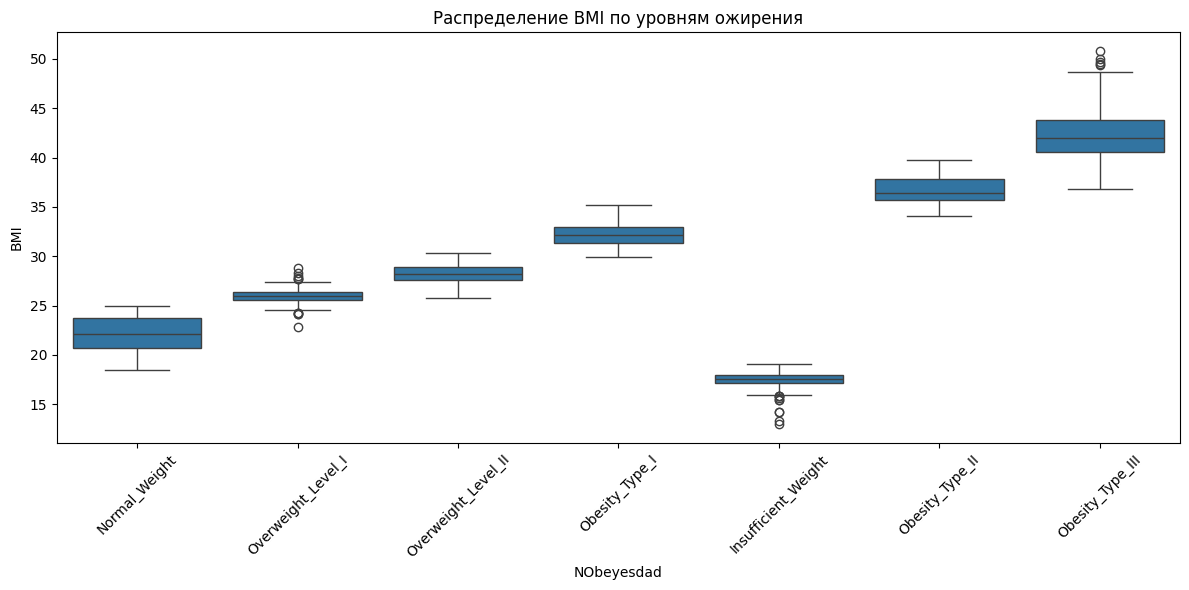

In [13]:
# Создадим BMI (Индекс Массы Тела) для лучшего понимания
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Распределение BMI по категориям ожирения
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='NObeyesdad', y='BMI')
plt.xticks(rotation=45)
plt.title('Распределение BMI по уровням ожирения')
plt.tight_layout()
plt.show()

## 3. Анализ категориальных признаков

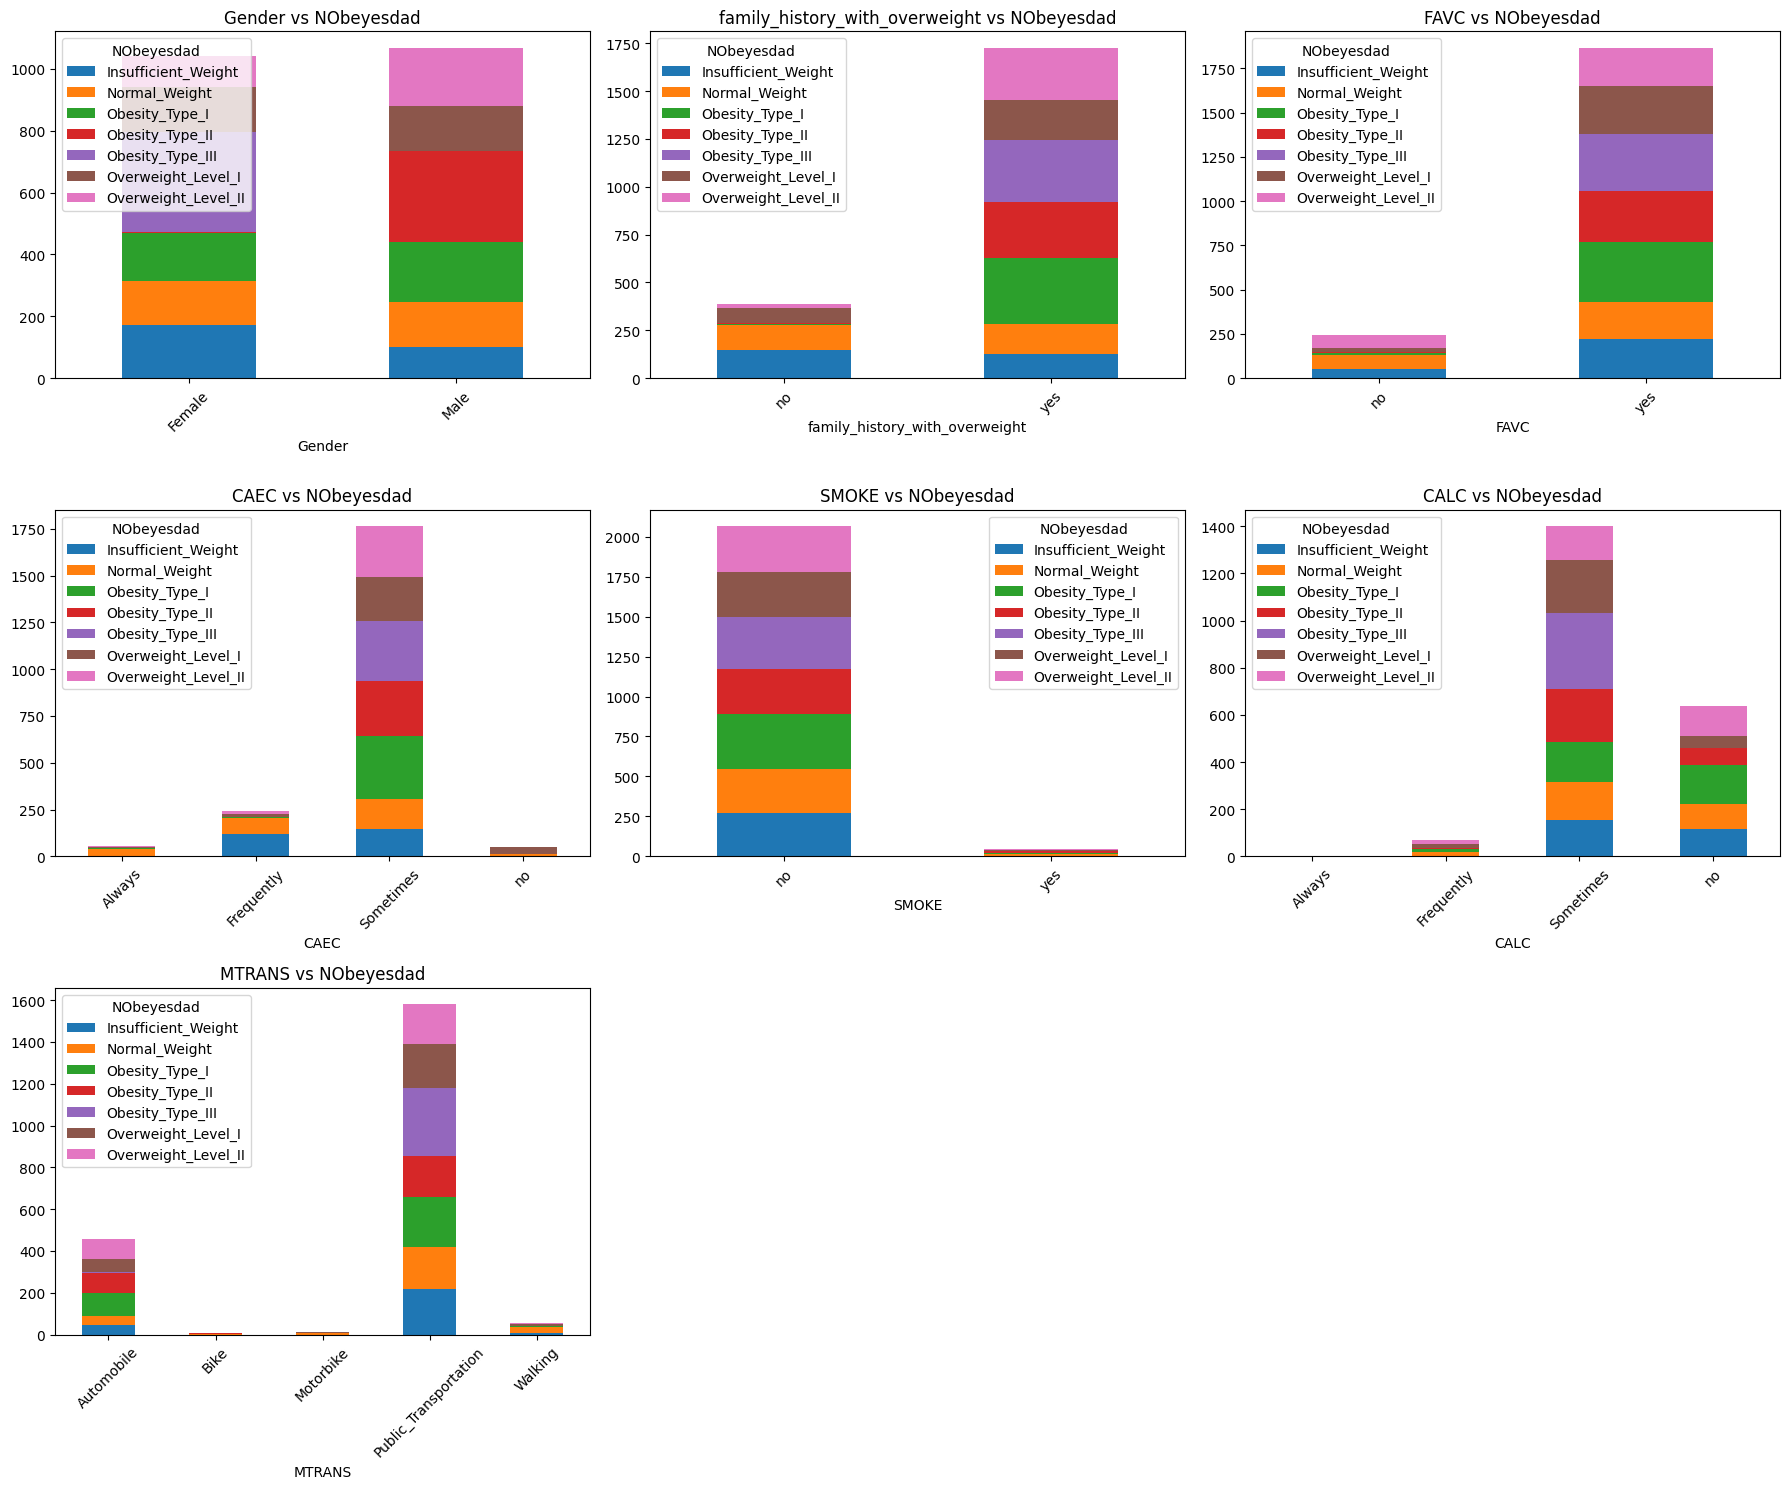

In [14]:
# Посмотрим как категориальные признаки распределены относительно целевой переменной
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        pd.crosstab(data[col], data['NObeyesdad']).plot(kind='bar', ax=axes[i], stacked=True)
        axes[i].set_title(f'{col} vs NObeyesdad')
        axes[i].tick_params(axis='x', rotation=45)

# Убираем лишние subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 4. Проверка на выбросы в числовых признаках

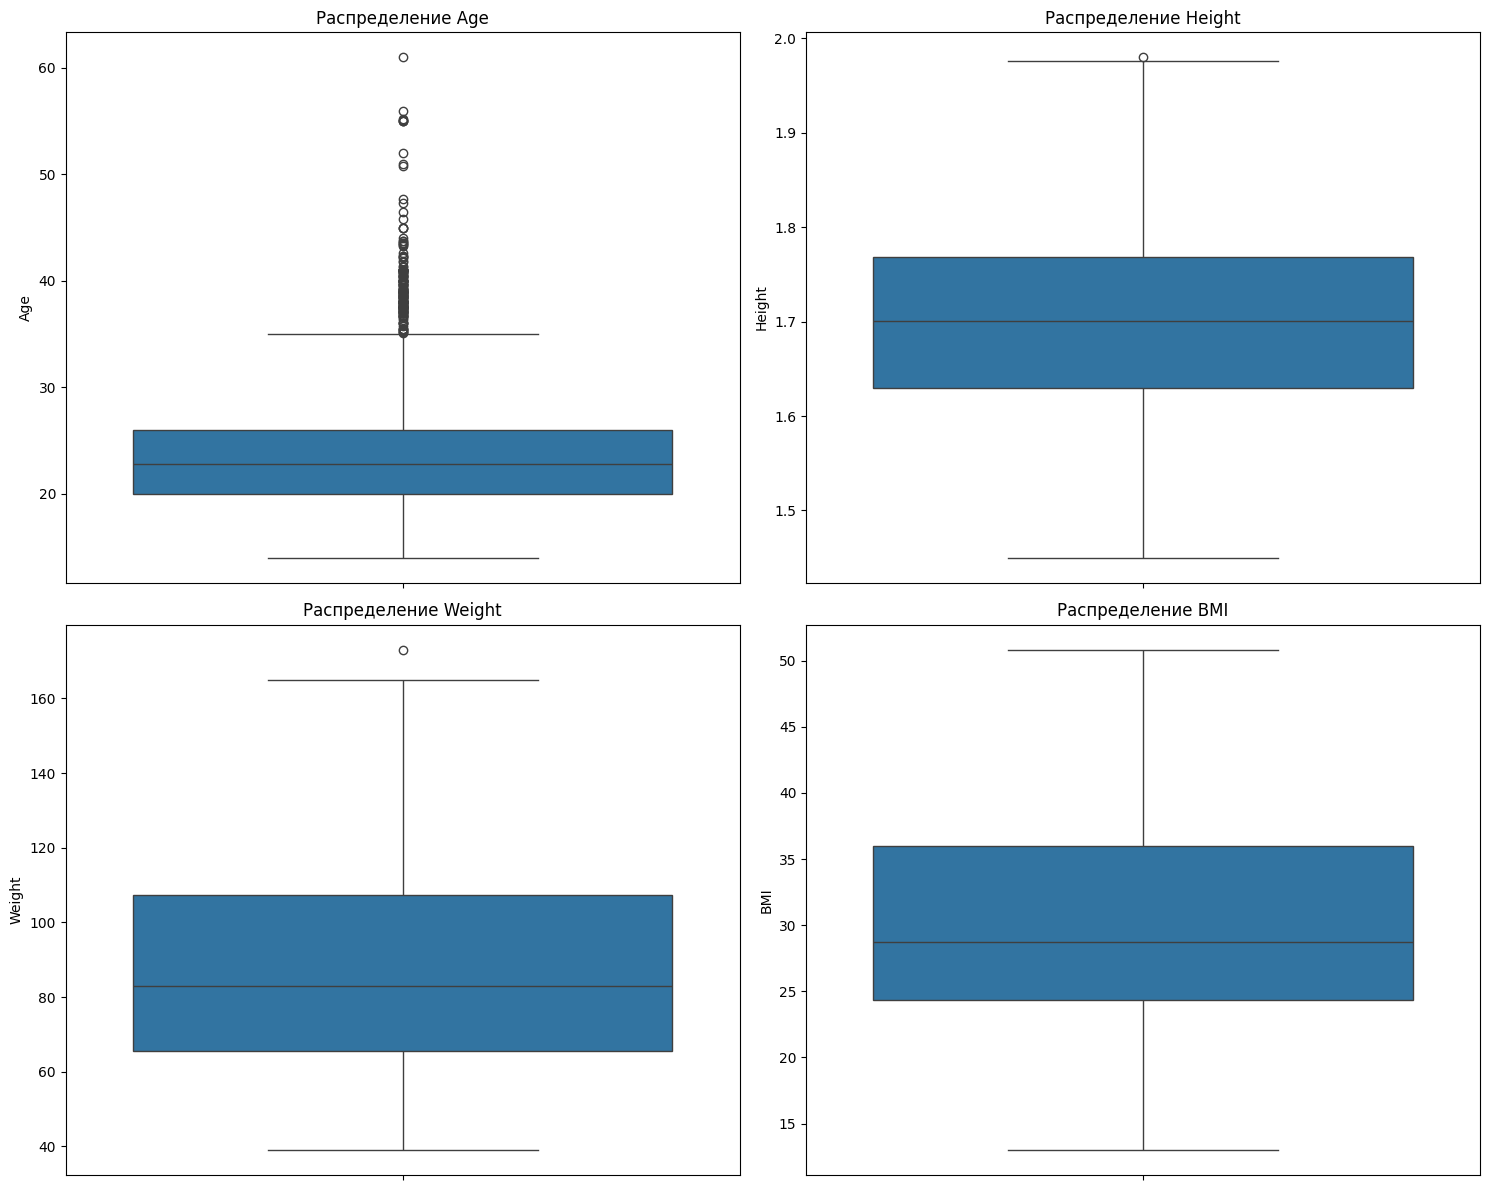

In [20]:
numeric_cols = ['Age', 'Height', 'Weight', 'BMI']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.boxplot(data=data, y=col, ax=axes[i])
        axes[i].set_title(f'Распределение {col}')

plt.tight_layout()
plt.show()

## 5. Анализ взаимосвязей через pairplot

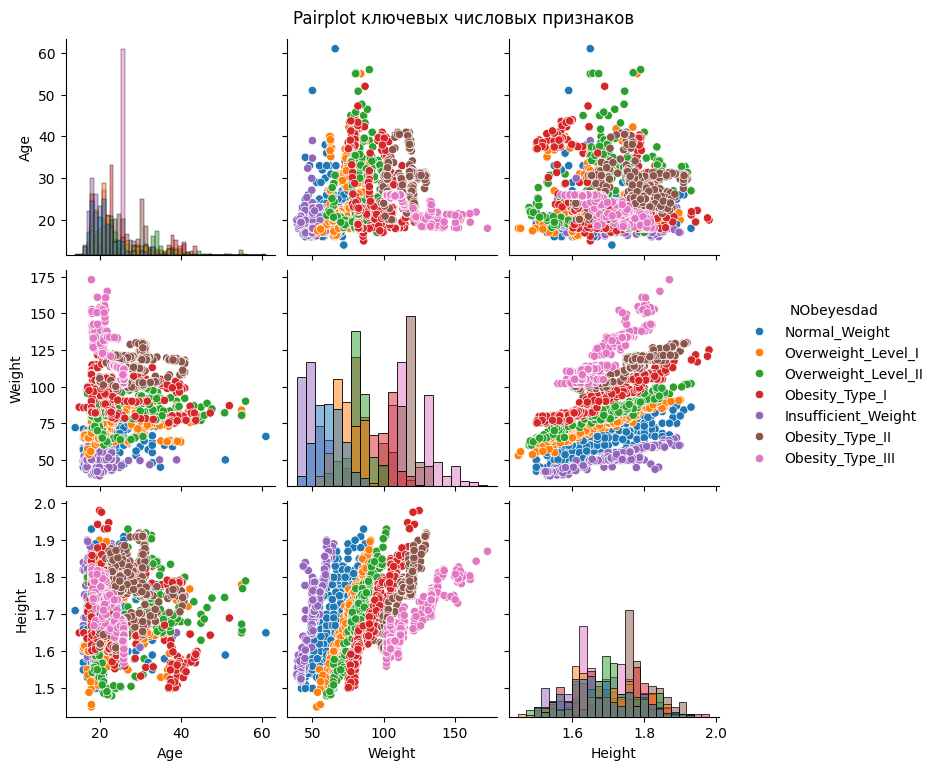

In [16]:
# Выберем наиболее интересные числовые признаки для pairplot
key_numeric = ['Age', 'Weight', 'Height']

sns.pairplot(data=data, vars=key_numeric, hue='NObeyesdad', diag_kind='hist')
plt.suptitle('Pairplot ключевых числовых признаков', y=1.02)
plt.show()

## 6. Анализ "качество питания" vs "уровень ожирения"

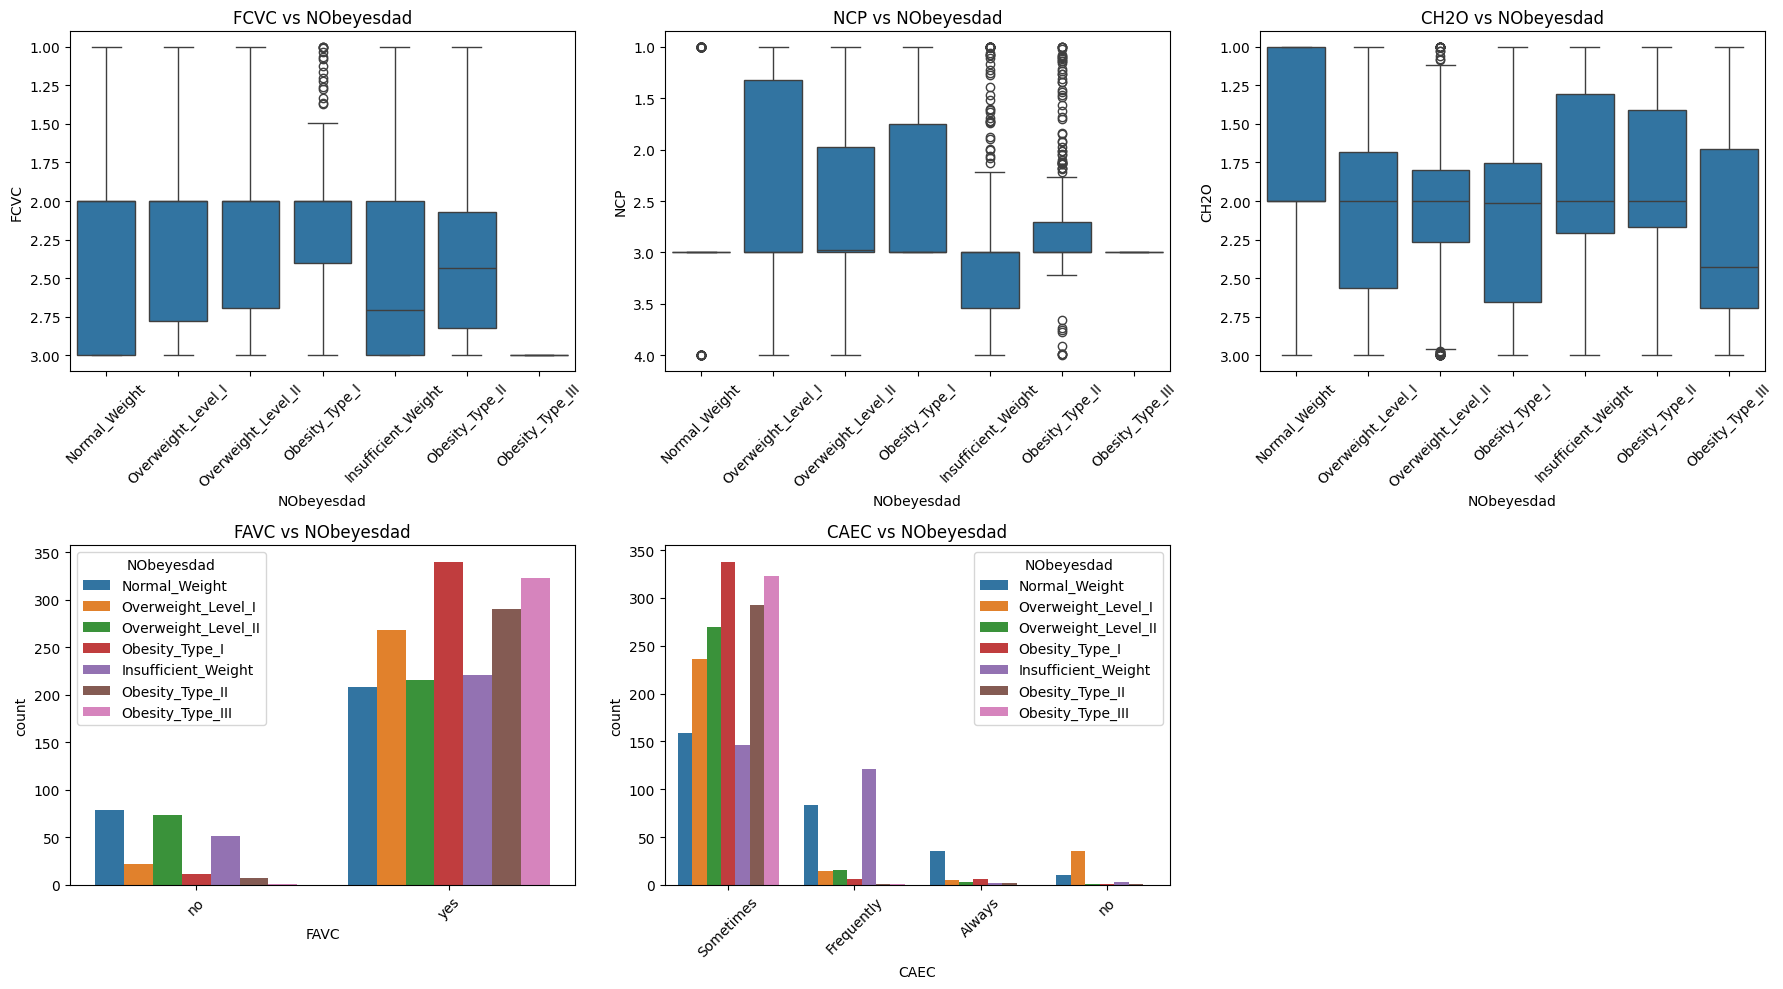

In [17]:
nutrition_cols = ['FCVC', 'NCP', 'CH2O', 'FAVC', 'CAEC']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(nutrition_cols):
    if data[col].dtype == 'object':
        sns.countplot(data=data, x=col, hue='NObeyesdad', ax=axes[i])
    else:
        sns.boxplot(data=data, x='NObeyesdad', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs NObeyesdad')
    axes[i].tick_params(axis='x', rotation=45)

# Убираем лишние subplots
for i in range(len(nutrition_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 7. Проверка мультиколлинеарности

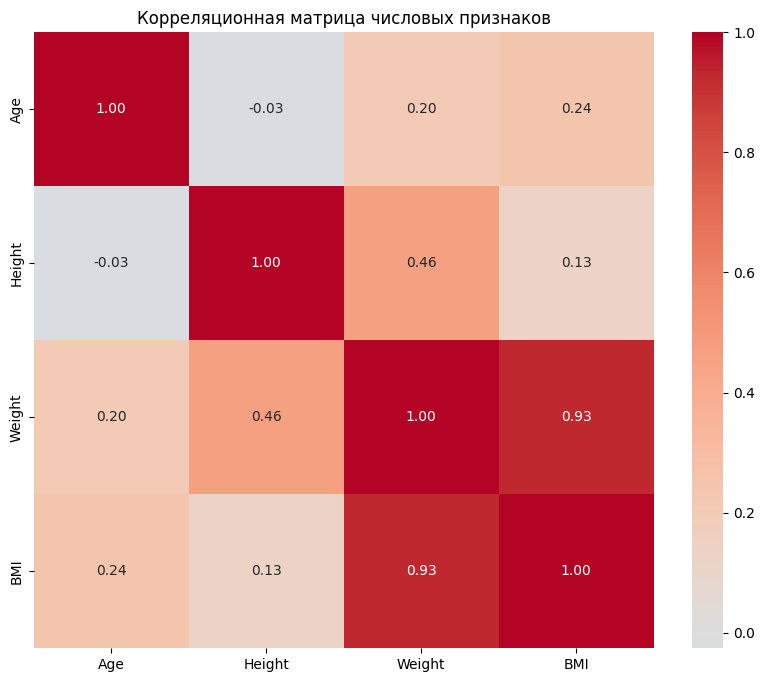

In [18]:
# Числовая корреляционная матрица (для числовых признаков)
numeric_corr = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# Выводы после анализа

Что искать в этом анализе:
Дисбаланс классов в целевой переменной

Выбросы в числовых признаках

Сильные корреляции между признаками

Паттерны во взаимосвязях признаков с целевой переменной

Признаки с низкой вариативностью (которые мало влияют на цель)

После этого анализа мы сможем принять обоснованное решение:

Нужно ли feature engineering?

Какие признаки могут быть лишними?

Нужна ли обработка выбросов?

Нужна ли балансировка классов?

